In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('PlayTennis.csv')
df

,Outlook,Temperature,Humidity,Wind,Play Tennis
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes
5,Rain,Cool,Normal,Strong,No
6,Overcast,Cool,Normal,Strong,Yes
7,Sunny,Mild,High,Weak,No
8,Sunny,Cool,Normal,Weak,Yes
9,Rain,Mild,Normal,Weak,Yes


In [3]:
df.columns

Index(['Outlook', 'Temperature', 'Humidity', 'Wind', 'Play Tennis'], dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Outlook      14 non-null     object
 1   Temperature  14 non-null     object
 2   Humidity     14 non-null     object
 3   Wind         14 non-null     object
 4   Play Tennis  14 non-null     object
dtypes: object(5)
memory usage: 688.0+ bytes


In [5]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()


In [6]:
for col in df.columns:
    if df[col].dtype=='object':
        df[col] =label.fit_transform(df[col])
        labeled_data=dict(zip(label.transform(label.classes_),label.classes_))
        print(col,'={')
        for encoded_value,original_value in labeled_data.items():
            print(f'"{original_value}":{encoded_value}',end=',')
        print('}')
        #print('------------------------------------------')

Outlook ={
"Overcast":0,"Rain":1,"Sunny":2,}
Temperature ={
"Cool":0,"Hot":1,"Mild":2,}
Humidity ={
"High":0,"Normal":1,}
Wind ={
"Strong":0,"Weak":1,}
Play Tennis ={
"No":0,"Yes":1,}


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Outlook      14 non-null     int32
 1   Temperature  14 non-null     int32
 2   Humidity     14 non-null     int32
 3   Wind         14 non-null     int32
 4   Play Tennis  14 non-null     int32
dtypes: int32(5)
memory usage: 408.0 bytes


In [8]:
x=df.drop(columns=['Play Tennis'])
y=df['Play Tennis']


In [9]:
# lets import the decision tree from tree class in sklearn module
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
model.fit(x,y)

DecisionTreeClassifier()

In [10]:
tree_=model.tree_
root_node=0 # as the root node index will be zero
feature_names=x.columns
# now getting the index of root node
root_feature_index=tree_.feature[root_node]
print("Root node index:",root_feature_index)
# getting the name from the original data set
root_feature_name=feature_names[root_feature_index]
print("Root Feature Name:",root_feature_name)
# now getting the impurity of fitted data
print("Root Node Impurity is:",tree_.impurity[root_node])

Root node index: 0
Root Feature Name: Outlook
Root Node Impurity is: 0.4591836734693877


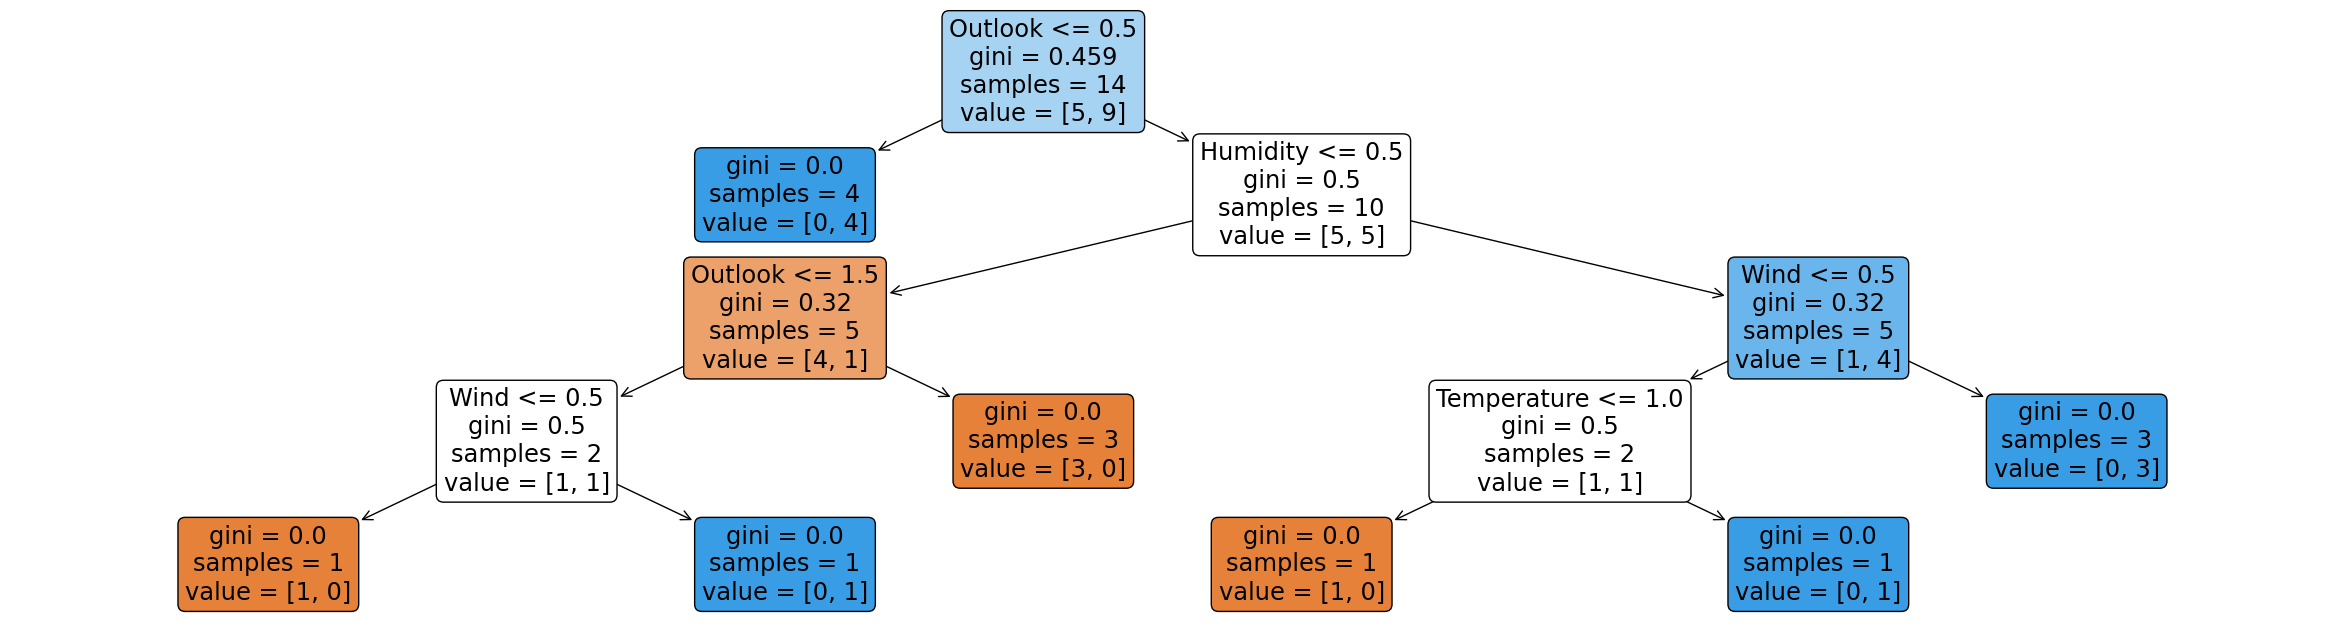

In [11]:
from sklearn import tree
import matplotlib.pyplot as plt
# now lets visualize the decision tree using plot_tree
# then decide thr figure size using figsize
plt.figure(figsize=(30,8))
tree.plot_tree(model,feature_names=x.columns,filled=True,rounded=True)
#plt.show()
plt.savefig("Tennis.png")

In [12]:
x.head();y

0     0
1     0
2     1
3     1
4     1
5     0
6     1
7     0
8     1
9     1
10    1
11    1
12    1
13    0
Name: Play Tennis, dtype: int32

In [13]:
model.predict([[2,1,0,0]])

C:\Users\Deepu\Desktop\Project\kits\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [14]:
label.inverse_transform(model.predict(x.iloc[[0]]))[0]

'No'

In [15]:
## Apply Decision_tree classifier on loan_dataset
#read the dataset
#data = pd.read_csv('loan-train.csv')
#data

In [16]:
#Converting our Credit History into object dtype
#data['Credit_History']= data['Credit_History'].astype('object')
#data['Credit_History']

In [17]:
#data.drop(columns='Loan_ID',inplace=True)

In [18]:
#We will fill the missing values from object columns and other dtype columns
#following a methodology
#data.columns
#we will iterate with each column for object columns will fill with mode
#else will fill with mean
#for col in data.columns:
#    if data[col].dtype == "object":
#        data[col] = data[col].fillna(data[col].mode()[0])
#    else:
#       data[col] = data[col].fillna(data[col].mean())

In [19]:
#data.info()

In [20]:
#Removing Outliers from the dataframe -->we will create a final dataframe
def remove_outliers(df, threshold=3):
    df_cleaned = df.copy() #copy of dataframe
    #The threshold value determines how far from the first and third quartiles a data point must be to be considered an outlier
    for col in df_cleaned.select_dtypes(include=['int64',
                                               'float64']).columns:
        Q1 = df_cleaned[col].quantile(0.25) #25th percentile
        Q3 = df_cleaned[col].quantile(0.75) #75th percentile
        IQR = Q3 - Q1 #InterQuantile Range
        lower_bound = Q1 - threshold * IQR
        upper_bound = Q3 + threshold * IQR

        #Filter the DataFrame to keep only the rows where the
        #column values are within the calculated bounds,
        #effectively removing outliers
        df_cleaned = df_cleaned[
            (df_cleaned[col] >= lower_bound) &
            (df_cleaned[col] <= upper_bound)
        ]
    return df_cleaned

In [21]:
dat = remove_outliers(df) #  removing the outliers from the data
dat

,Outlook,Temperature,Humidity,Wind,Play Tennis
0,2,1,0,1,0
1,2,1,0,0,0
2,0,1,0,1,1
3,1,2,0,1,1
4,1,0,1,1,1
5,1,0,1,0,0
6,0,0,1,0,1
7,2,2,0,1,0
8,2,0,1,1,1
9,1,2,1,1,1


In [22]:
df.to_csv("Tennis.csv",index=False)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Outlook      14 non-null     int32
 1   Temperature  14 non-null     int32
 2   Humidity     14 non-null     int32
 3   Wind         14 non-null     int32
 4   Play Tennis  14 non-null     int32
dtypes: int32(5)
memory usage: 408.0 bytes


In [23]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [24]:
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')

In [25]:
log_reg=LogisticRegression()
log_reg

LogisticRegression()

In [26]:
log_reg.fit(x_train,y_train)

LogisticRegression()

In [27]:
y_pred=log_reg.predict(x_test)
y_pred

array([1, 1, 1, 1])

In [28]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,ConfusionMatrixDisplay

In [29]:
print("Accuracy Score:",accuracy_score(y_test,y_pred))

Accuracy Score: 0.75


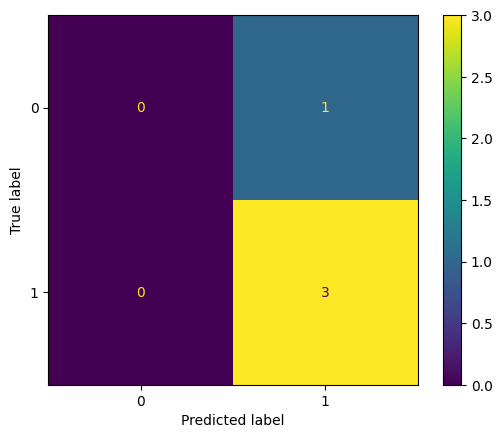

In [30]:
import matplotlib.pyplot as plt
cm=confusion_matrix(y_test,y_pred)
disp=ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [31]:
# let get into the hyperparameter Tuning
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
#define the parameter grid for the logistic regression
param_grid={ 'C':[0.001,0.01,0.1,1,10,100],
            'penalty':['l1','l2'],
            'solver':['liblinear','saga'],
}
#define the model
log_reg=LogisticRegression()

#assign the logistic regression parameters to GridSearchCV
grid_search=GridSearchCV(log_reg,param_grid=param_grid,cv=5,n_jobs=1,verbose=1)

#fitting the model
grid_search.fit(x_train,y_train)
print("Best parameters:",grid_search.best_params_)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best parameters: {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}


In [32]:
model=LogisticRegression(C=1,penalty='l1',solver='liblinear')
model.fit(x_train,y_train)

LogisticRegression(C=1, penalty='l1', solver='liblinear')

In [33]:
y_pred=model.predict(x_test)
y_pred

array([1, 0, 1, 1])

In [34]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [35]:
print("Accuracy Score:",accuracy_score(y_test,y_pred))

Accuracy Score: 0.5


In [36]:
print("Classification Report:",classification_report(y_test,y_pred))

Classification Report:               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.67      0.67      0.67         3

    accuracy                           0.50         4
   macro avg       0.33      0.33      0.33         4
weighted avg       0.50      0.50      0.50         4



In [37]:
print("Confusion matrix:\n",confusion_matrix(y_test,y_pred))

Confusion matrix:
 [[0 1]
 [1 2]]


In [38]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Outlook      14 non-null     int32
 1   Temperature  14 non-null     int32
 2   Humidity     14 non-null     int32
 3   Wind         14 non-null     int32
dtypes: int32(4)
memory usage: 352.0 bytes


In [39]:
x.columns

Index(['Outlook', 'Temperature', 'Humidity', 'Wind'], dtype='object')

In [40]:
outlook=int(input("Enter Outlook value:"))
temperature=int(input("Enter Temperature value:"))
humidity=int(input("Enter humidity value:"))
wind=int(input("Enter wind value:"))

Enter Outlook value: 2
Enter Temperature value: 1
Enter humidity value: 1
Enter wind value: 1


In [41]:
import numpy as np
user_input=np.array([[outlook,temperature,humidity,wind]])
# now lets check the prediction
result=model.predict(user_input)[0]
if result==1:
    print("Yes you can play tennis")
else:
    print("No you can't play tennis")

Yes you can play tennis


In [42]:
import pickle
pickle.dump(log_reg,open('log_model.pkl','wb'))

In [43]:
from sklearn.linear_model import LogisticRegression
import pickle
import numpy as np

In [44]:
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [45]:
with open('log_model.pkl', 'wb') as file:
    pickle.dump(model, file)

In [46]:
model=pickle.load(open('log_model.pkl','rb'))
user_input=np.array([[outlook,temperature,humidity,wind]])
result=model.predict(user_input)[0]
if result==1:
    print("Yes you can play tennis")
else:
    print("No you can't play tennis")

Yes you can play tennis


In [47]:
!pip install streamlit